In [82]:
#%% import modules 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.interpolate import griddata
import h5py 
plt.rcParams.update({'font.size': 18})

In [63]:
step = 73  # 59, 73
lab = 100
tp = 1500
path = '/home/lxue07/Documents/aspect/rifting/output-test_from_extension_3.0_lab{}_tp{}_cons_load_ex3mm_hdf5/\
solution/solution-00'.format(lab, tp)+str(step).zfill(3)+ '.h5'
f_l = h5py.File(path, 'r')
path = '/home/lxue07/Documents/aspect/rifting/output-test_from_extension_3.0_lab{}_tp{}_unload_load_ex3mm_hdf5/\
solution/solution-00'.format(lab, tp)+str(step).zfill(3)+ '.h5'
f_ul = h5py.File(path, 'r')

print ('output variables:', f_ul.keys())
path_xy = '/home/lxue07/Documents/aspect/rifting/output-test_from_extension_3.0_lab{}_tp{}_unload_load_ex3mm_hdf5/\
solution//mesh-00000.h5'.format(str(lab), str(tp))
mesh =h5py.File(path_xy, 'r')

#node in x, y, z
x = mesh['nodes'][:,0]
y = mesh['nodes'][:,1]
xx_ul = f_ul['stress_xx'][:,0]
xx_l = f_l['stress_xx'][:,0]
yy_ul = f_ul['stress_yy'][:,0]
yy_l = f_l['stress_yy'][:,0]
xy_ul = f_ul['stress_xy'][:,0]
xy_l = f_l['stress_xy'][:,0]
s_xx_ul = f_ul['shear_stress_xx'][:,0]
s_xx_l = f_l['shear_stress_xx'][:,0]
s_yy_ul = f_ul['shear_stress_yy'][:,0]
s_yy_l = f_l['shear_stress_yy'][:,0]
s_xy_ul = f_ul['shear_stress_xy'][:,0]
s_xy_l = f_l['shear_stress_xy'][:,0]
non_ps_l = f_l['noninitial_plastic_strain'][:,0]
non_ps_ul = f_ul['noninitial_plastic_strain'][:,0]
ps_l = f_l['plastic_strain'][:,0]
ps_ul = f_ul['plastic_strain'][:,0]
sr_l = f_l['strain_rate'][:,0]
sr_ul = f_ul['strain_rate'][:,0]

# xy_ul = np.sqrt(xx_ul**2 + yy_ul**2)
# xy_l = np.sqrt(xx_l**2 + yy_l**2)
# # strain_rate = f_ul['strain_rate'][:,0]

p_l= f_l['p'][:,0]
p_ul = f_ul['p'][:,0]
nonad_p_l = f_l['nonadiabatic_pressure'][:,0]
nonad_p_ul = f_ul['nonadiabatic_pressure'][:,0]
t_ul = f_ul['T'][:,0]
t_l = f_l['T'][:,0]
mf_ul = f_ul['melt_fraction'][:,0]
mf_l = f_l['melt_fraction'][:,0]
v_ul = f_ul['velocity'][:,0]
v_l = f_l['velocity'][:,0]


# time 
df= pd.read_csv('/home/lxue07/Documents/aspect/rifting/output-test_from_extension_3.0_lab{}_tp{}_cons_load_ex3mm_hdf5/statistics'.format(str(lab), str(tp)), 
                skiprows=68, sep= '\s+', names = range(68))
time = df[1][df[0]==step].values[0]/1e6
print ('time is:', time, ' Ma')
#df.head()



output variables: <KeysViewHDF5 ['T', 'adiabatic_heating', 'compositional_heating', 'crust_lower', 'crust_upper', 'current_cohesions', 'current_friction_angles', 'density', 'latent_heat', 'mantle_lithosphere', 'melt_fraction', 'nonadiabatic_pressure', 'nonadiabatic_temperature', 'noninitial_plastic_strain', 'p', 'plastic_strain', 'plastic_yielding', 'principal_stress_1', 'principal_stress_2', 'principal_stress_direction_1', 'principal_stress_direction_2', 'shear_heating', 'shear_stress_xx', 'shear_stress_xy', 'shear_stress_yx', 'shear_stress_yy', 'strain_rate', 'stress_xx', 'stress_xy', 'stress_yx', 'stress_yy', 'velocity', 'viscosity']>
time is: 8.055071991064  Ma


<a list of 5 text.Text objects>

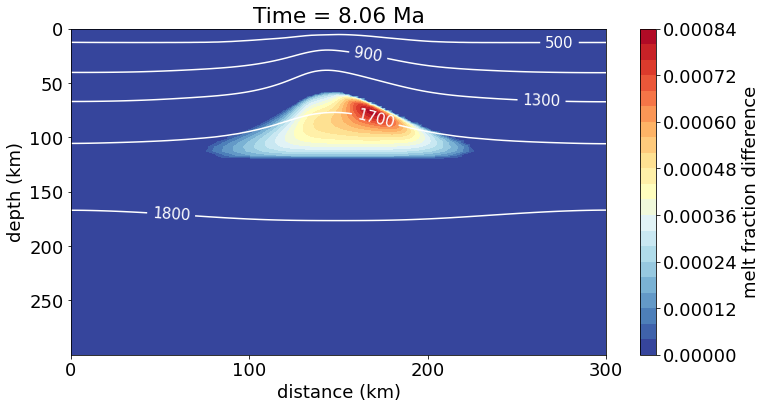

In [54]:
fig,ax = plt.subplots(figsize=(12,6))

ax1 = plt.tricontour(x, y, t_ul, colors=['white'], levels = [500, 900, 1300, 1700, 1800])
plt.tricontourf(x, y, mf_ul-mf_l,cmap='RdYlBu_r', levels = 20)
plt.colorbar(label = 'melt fraction difference')
plt.xlabel('distance (km)')
plt.ylabel('depth (km)')
plt.title('Time = {:.2f} Ma'.format(time))
ax.set_xticks([0, 100000, 200000, 300000])
ax.set_xticklabels([0, 100,200, 300 ])

ax.set_yticks([50000, 100000, 150000, 200000, 250000, 300000])
ax.set_yticklabels([250, 200, 150,100, 50, 0])
plt.clabel(ax1, fontsize=15, inline=1,fmt = '%1.0f')

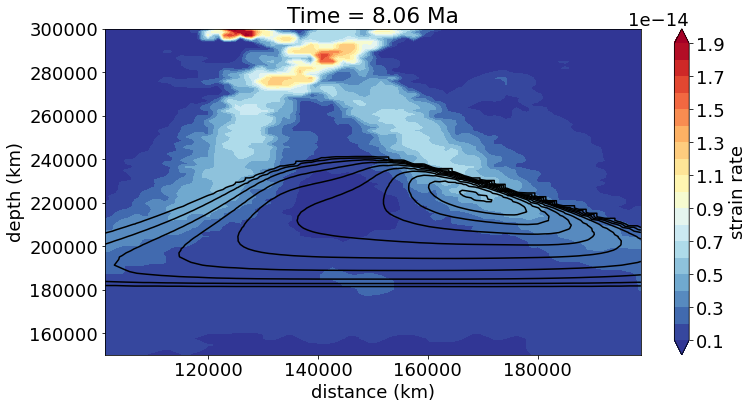

In [120]:


#ax1 = plt.tricontour(x, y, t, colors=['white'], levels = [500, 900, 1300, 1700])
#plt.tricontourf(x, y, non_ps_ul,cmap='RdYlBu_r', levels = 100)

con = pd.DataFrame()
con['x'] = x
con['y'] = y
con['t_l'] = t_l 
con['t_ul'] = t_ul 
con['mf_l'] = mf_l 
con['mf_ul'] = mf_ul
con['vis_ul'] = f_ul['viscosity'][:,0]
con['vis_l'] = f_l['viscosity'][:,0]
con['v_ul'] = f_ul['velocity'][:,0]
con['v_l'] = f_l['velocity'][:,0]
con['sr_l'] = f_l['strain_rate'][:,0]
con['sr_ul'] = f_ul['strain_rate'][:,0]
con['non_ps_l'] = f_l['noninitial_plastic_strain'][:,0]
con['non_ps_ul'] = f_ul['noninitial_plastic_strain'][:,0]

con = con[(con['x']>=100e3)&(con['x']<=200e3)&(con['y']>=150e3)]

xi = np.linspace(np.min(con['x']), np.max(con['x']), 100)
yi = np.linspace(np.min(con['y']), np.max(con['y']), 100)
zia = griddata((con['x'],con['y']),con['sr_ul'],(xi[None,:],yi[:,None]),method='linear')

#plt.contourf(xi, yi, zia, 8)


fig,ax = plt.subplots(figsize=(12,6))
plt.tricontour(con['x'], con['y'], con['mf_ul']-con['mf_l'],colors=['black'], levels = 10,
              )
# plt.tricontourf(con['x'], con['y'], con['vis_ul']-con['vis_l'],cmap='RdYlBu_r',
#                 vmax = 1e24,
#                 vmin = 1e19,
#                 extend='min',
# #          levels = np.linspace(1e19, 1e24, 20) 
#                )
plt.contourf(xi, yi, zia,cmap='RdYlBu_r',
             levels = 20, 
#             levels = np.linspace(1e19, 1e21, 20), 
#                vmax = 1e22,
#                 vmin = 1e20,
                extend='both',
            )
plt.colorbar(label = 'strain rate')
plt.xlabel('distance (km)')
plt.ylabel('depth (km)')

plt.title('Time = {:.2f} Ma'.format(time))
# ax.set_xticks([0, 100000, 200000, 300000])
# ax.set_xticklabels([0, 100,200, 300 ])
# plt.ylim(150e3)
# plt.xlim([100e3, 200e3])


ax1.autoscale()  # auto-scale
# ax.set_yticks([50000, 100000, 150000, 200000, 250000, 300000])
# ax.set_yticklabels([250, 200, 150,100, 50, 0])
#plt.clabel(ax1, fontsize=15, inline=1,fmt = '%1.0f')

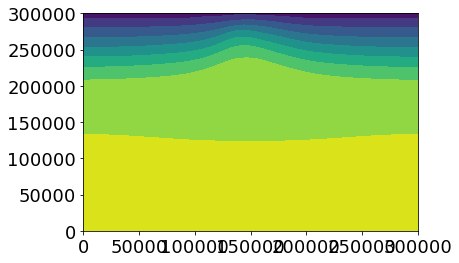

In [81]:

xi = np.linspace(np.min(x), np.max(x), 100)
yi = np.linspace(np.min(y), np.max(y), 100)
zia = griddata((x,y),t_ul,(xi[None,:],yi[:,None]),method='linear')

plt.contourf(xi, yi, zia, 8)

[Text(0, 50000, '250'),
 Text(0, 100000, '200'),
 Text(0, 150000, '150'),
 Text(0, 200000, '100'),
 Text(0, 250000, '50'),
 Text(0, 300000, '0')]

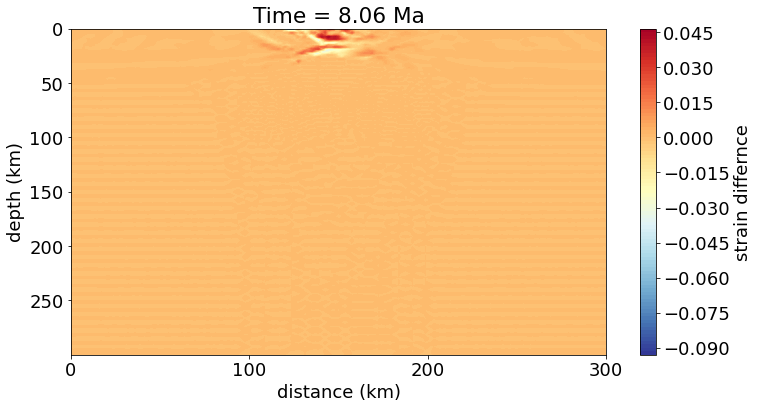

In [17]:
fig,ax = plt.subplots(figsize=(12,6))

#ax1 = plt.tricontour(x, y, t, colors=['white'], levels = [500, 900, 1300, 1700])
plt.tricontourf(x, y, ps_ul - ps_l,cmap='RdYlBu_r', levels = 100)
plt.colorbar(label = 'strain differnce')
plt.xlabel('distance (km)')
plt.ylabel('depth (km)')

plt.title('Time = {:.2f} Ma'.format(time))
ax.set_xticks([0, 100000, 200000, 300000])
ax.set_xticklabels([0, 100,200, 300 ])

ax.set_yticks([50000, 100000, 150000, 200000, 250000, 300000])
ax.set_yticklabels([250, 200, 150,100, 50, 0])
#plt.clabel(ax1, fontsize=15, inline=1,fmt = '%1.0f')

In [10]:
# lake level calculation
steps = 157
age = np.linspace(0, 10, steps)
# note that the time here in unit of Ma
ll = [0]*steps
for i, t in enumerate(age):
    if t<=7:
        ll[i] = 8e2
    elif t<=8:
        ll[i] = -800*t+6400
    elif t<=9:
        ll[i] = 800*t-6400
    else:
        ll[i] = 800

# Melt Calculation
#refined cell size x: 1875m y: 1875m checking the vtu file
cell_v= 1875*1875 #m^2
# length of lake
length = 260e3 #m
# melt_v_l = sum([x*cell_v for x in f_l['melt_fraction'][:,0]])
# diff_melt_v_l = sum([x*cell_v for x in diff_mf])
# diff_melt_v_l*length*1e-9 # in km^3


In [113]:

melt_v_l_10ma = []
melt_v_ul_10ma = []
diff_melt_v_ul_10ma = []
years = []
lab = 150
tp = 1450

for t in range(steps):
    path = '/home/lxue07/Documents/aspect/rifting/output-test_from_extension_3.0_lab{}_tp{}_cons_load_ex3mm_hdf5/\
solution/solution-00'.format(str(lab), str(tp))+str(t).zfill(3)+ '.h5'
    f_l = h5py.File(path, 'r')
    path = '/home/lxue07/Documents/aspect/rifting/output-test_from_extension_3.0_lab{}_tp{}_unload_load_ex3mm_hdf5/\
solution/solution-00'.format(str(lab), str(tp))+str(t).zfill(3)+ '.h5'
    f_ul = h5py.File(path, 'r')

    path_xy = '/home/lxue07/Documents/aspect/rifting/output-test_from_extension_3.0_lab{}_tp{}_unload_load_ex3mm_hdf5/\
solution//mesh-00000.h5'.format(str(lab), str(tp))
    mesh =h5py.File(path_xy, 'r')
    mesh =h5py.File(path_xy, 'r')
    #node in x, y, z
    x = mesh['nodes'][:,0]
    y = mesh['nodes'][:,1]

    mf_ul = f_ul['melt_fraction'][:,0]
    mf_l = f_l['melt_fraction'][:,0]

    
    melt_v_l = sum([x*cell_v*length*1e-9 for x in mf_l])
    melt_v_ul = sum([x*cell_v*length*1e-9 for x in mf_ul])
    #diff_melt_v_l = sum([x*cell_v*length*1e-9 for x in diff_mf])
    
    melt_v_l_10ma.append(melt_v_l)
    melt_v_ul_10ma.append(melt_v_ul)
    diff_melt_v_ul_10ma.append (melt_v_ul-melt_v_l)
    
    
    df= pd.read_csv('/home/lxue07/Documents/aspect/rifting/output-test_from_extension_3.0_lab{}_tp{}_cons_load_ex3mm_hdf5/statistics'.format(str(lab), str(tp)), 
                skiprows=68, sep= '\s+', names = range(68))
    time = df[1][df[0]==t].values[0]/1e6
    years.append(time)

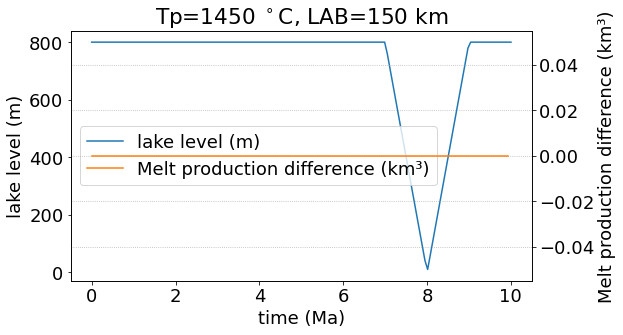

In [114]:
fig, ax = plt.subplots(figsize=(9,5))
ln1 = ax.plot(age, ll, label = 'lake level (m)')
ax.set_xlabel('time (Ma)')
ax.set_ylabel('lake level (m)')
ax2 = ax.twinx()
ln2 = ax2.plot(years,diff_melt_v_ul_10ma, c = 'C1', label = 'Melt production difference (km\u00b3)')
ax2.set_ylabel('Melt production difference (km\u00b3)')
lns = ln1 +ln2 
labs = [l.get_label() for l in lns]
ax.legend(lns, labs, )
plt.grid(linestyle='dotted')
plt.title('Tp={} $^\circ$C, LAB={} km'.format(tp, lab ))
plt.tight_layout()



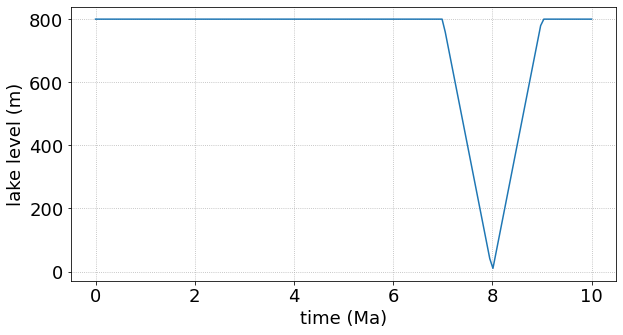

In [12]:
fig, ax = plt.subplots(figsize=(9,5))
ln1 = ax.plot(age, ll, label = 'lake level (m)')
ax.set_xlabel('time (Ma)')
ax.set_ylabel('lake level (m)')
plt.grid(linestyle='dotted')
#plt.title('Tp={} $^\circ$C, LAB={} km'.format(tp, lab ))
plt.tight_layout()

In [106]:
diff_melt_v_l_1ma = []
melt_v_l_1ma = []
melt_v_unl_1ma = []
for t in range(25):
    path = '/home/lxue07/Documents/aspect/rifting/'\
    'output-test-from-extension_2.64_cons_load_hdf5/solution/solution-000'+str(t).zfill(2)+ '.h5'
    f_l = h5py.File(path, 'r')
    path = '/home/lxue07/Documents/aspect/rifting/'\
    'output-test-from-extension_2.64_unload_load_hdf5/solution/solution-000'+ str(t).zfill(2)+ '.h5'
    f_ul = h5py.File(path, 'r')


    path_xy = '/home/lxue07/Documents/aspect/rifting/'\
    'output-test-from-extension_2.64_cons_load_hdf5/solution/mesh-00000.h5'
    mesh =h5py.File(path_xy, 'r')
    #node in x, y, z
    x = mesh['nodes'][:,0]
    y = mesh['nodes'][:,1]

    diff_mf = f_ul['melt_fraction'][:,0] - f_l['melt_fraction'][:,0]
    diff_p = f_ul['p'][:,0] - f_l['p'][:,0]
    diff_nonad_p = f_ul['nonadiabatic_pressure'][:,0] - f_l['nonadiabatic_pressure'][:,0]
    p_l= f_l['p'][:,0]
    p_ul = f_ul['p'][:,0]
    
    cell_v= 1250*1250 #m^2
    # length of lake
    length = 260e3 #m
    melt_v_l = sum([x*cell_v for x in f_l['melt_fraction'][:,0]])
    diff_melt_v_l = sum([x*cell_v for x in diff_mf])
    
    melt_v_l_1ma.append(melt_v_l*length*1e-9)
    melt_v_unl_1ma.append(sum([x*cell_v for x in f_ul['melt_fraction'][:,0]])*length*1e-9)

    diff_melt_v_l_1ma.append (diff_melt_v_l*length*1e-9)

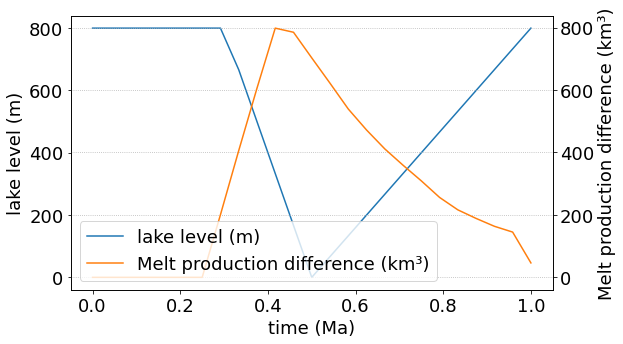

In [12]:
fig, ax = plt.subplots(figsize=(9,5))
ln1 = ax.plot(np.linspace(0, 1, 25), ll, label = 'lake level (m)')
ax.set_xlabel('time (Ma)')
ax.set_ylabel('lake level (m)')
ax2 = ax.twinx()
ln2 = ax2.plot(np.linspace(0, 1, 25),diff_melt_v_l_1ma, c = 'C1', label = 'Melt production difference (km\u00b3)')
ax2.set_ylabel('Melt production difference (km\u00b3)')
lns = ln1 +ln2
labs = [l.get_label() for l in lns]
ax2.legend(lns, labs, loc = 'lower left')
plt.grid(linestyle='dotted')
plt.tight_layout()

In [25]:
max_l_mf = []
max_ul_mf = []
max_l_mf_ht= []
max_ul_mf_ht= []
melt_v_l_1ma = []
melt_v_ul_1ma = []
diff_melt_v_l_1ma = []
t= 10
for t in range(25):
#     path = '/home/lxue07/Documents/aspect/rifting/'\
#     'output-test-from-extension_2.65_cons_load_highT_hdf5/solution/solution-000'+str(t).zfill(2)+ '.h5'
#     f_l = h5py.File(path, 'r')
#     path = '/home/lxue07/Documents/aspect/rifting/'\
#     'output-test-from-extension_2.65_unload_load_highT_hdf5/solution/solution-000'+ str(t).zfill(2)+ '.h5'
#     f_ul = h5py.File(path, 'r')
    
#     path = '/home/lxue07/Documents/aspect/rifting/'\
#     'output-test-from-extension_2.64_cons_load_highT_hdf5/solution/solution-000'+str(t).zfill(2)+ '.h5'
#     f_l = h5py.File(path, 'r')
#     path = '/home/lxue07/Documents/aspect/rifting/'\
#     'output-test-from-extension_2.64_unload_load_highT_hdf5/solution/solution-000'+ str(t).zfill(2)+ '.h5'
#     f_ul = h5py.File(path, 'r')
    
    path = '/home/lxue07/Documents/aspect/rifting/'\
    'output-test-from-extension_2.64_cons_load_hdf5/solution/solution-000'+str(t).zfill(2)+ '.h5'
    f_l = h5py.File(path, 'r')
    path = '/home/lxue07/Documents/aspect/rifting/'\
    'output-test-from-extension_2.64_unload_load_hdf5/solution/solution-000'+ str(t).zfill(2)+ '.h5'
    f_ul = h5py.File(path, 'r')
    
    
    path_xy = '/home/lxue07/Documents/aspect/rifting/'\
    'output-test-from-extension_2.64_cons_load_hdf5/solution/mesh-00000.h5'
    mesh =h5py.File(path_xy, 'r')
    #node in x, y, z
    x = mesh['nodes'][:,0]
    y = mesh['nodes'][:,1]

    diff_mf = f_ul['melt_fraction'][:,0] - f_l['melt_fraction'][:,0]
    diff_p = f_ul['p'][:,0] - f_l['p'][:,0]
    diff_nonad_p = f_ul['nonadiabatic_pressure'][:,0] - f_l['nonadiabatic_pressure'][:,0]
    p_l= f_l['p'][:,0]
    p_ul = f_ul['p'][:,0]
    
    max_l_mf_ht.append(max(f_l['melt_fraction'][:,0]))
    max_ul_mf_ht.append(max(f_ul['melt_fraction'][:,0]))
    
    cell_v= 1250*1250 #m^2
    # length of lake
    length = 260e3 #m
    melt_v_l = sum([x*cell_v for x in f_l['melt_fraction'][:,0]])
    diff_melt_v_l = sum([x*cell_v for x in diff_mf])
    
    melt_v_l_1ma.append(melt_v_l*length*1e-9)
    melt_v_ul_1ma.append(sum([x*cell_v for x in f_ul['melt_fraction'][:,0]])*length*1e-9)

    diff_melt_v_l_1ma.append (diff_melt_v_l*length*1e-9)

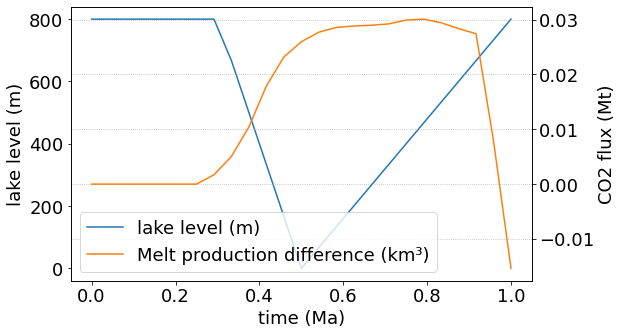

In [107]:
#co2 degassing:
#Ba: ol/liq: 1.000000e-09 ppm milligrams per liter (mg/L) = 1e9 g/km3
#ree = pd.read_csv('../table/Kelemen_2002.csv', sep = '\t')
#ree.head()
co2= [1e-03*v for v in diff_melt_v_l_1ma]
fig, ax = plt.subplots(figsize=(9,5))
ln1 = ax.plot(np.linspace(0, 1, 25), ll, label = 'lake level (m)')
ax.set_xlabel('time (Ma)')
ax.set_ylabel('lake level (m)')
ax2 = ax.twinx()
ln2 = ax2.plot(np.linspace(0, 1, 25),co2, c = 'C1', label = 'Melt production difference (km\u00b3)')
ax2.set_ylabel('CO2 flux (Mt)')
lns = ln1 +ln2
labs = [l.get_label() for l in lns]
ax2.legend(lns, labs, loc = 'lower left')
plt.grid(linestyle='dotted')
plt.tight_layout()

In [93]:
ree.head(10)# vs/l

,element,ol/liq,opx/liq,cpx/liq,gar/liq,sp/liq,chondrite(ppm)
0,Ba,1.000000e-09,0.00001,0.00068,0.00001,0.0000,2.410
1,Th,1.000000e-09,0.00001,0.00100,0.00000,0.0000,0.029
2,U,1.000000e-09,0.00001,0.00300,0.00500,0.0000,0.008
3,K,1.000000e-09,0.00001,0.00720,0.00001,0.1000,545.000
4,Nb,1.000000e-03,0.00290,0.00770,0.01300,0.0100,0.246
5,La,7.000000e-06,0.00100,0.05360,0.00100,0.0006,0.237
6,Ce,1.000000e-05,0.00300,0.08580,0.00800,0.0006,0.612
7,Pb,1.000000e-05,0.00300,0.07200,0.00050,0.0000,2.470
8,Pr,4.000000e-05,0.00600,0.13000,0.03300,0.0006,0.095
9,Sr,1.000000e-05,0.00300,0.12800,0.00700,0.0000,7.260
